In [3]:
import numpy  as np
import torch
import torch.nn as nn
import scipy
from scipy.ndimage import gaussian_filter

class GaussianLayer(nn.Module):
    def __init__(self, kernel_size, sigma=7):
        super(GaussianLayer, self).__init__()
        assert kernel_size % 2 == 1
        self.kernel_size = kernel_size
        self.side = (kernel_size-1) // 2
        self.sigma = sigma
        self.seq = nn.Sequential(
            nn.ReflectionPad2d(self.side), 
            nn.Conv2d(3, 3, self.kernel_size, stride=1, padding=0, bias=None, groups=3)
        )

        self.weights_init()
    def forward(self, x):
        return self.seq(x)

    def weights_init(self):
        n= np.zeros((self.kernel_size, self.kernel_size))
        n[self.side, self.side] = 1
        k = gaussian_filter(n,sigma=self.sigma)
        for name, f in self.named_parameters():            
            f.data.copy_(torch.from_numpy(k))

gaussian = GaussianLayer(3, 2)
gaussian

GaussianLayer(
  (seq): Sequential(
    (0): ReflectionPad2d((1, 1, 1, 1))
    (1): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1), groups=3, bias=False)
  )
)

In [4]:
gaussian(torch.rand(1, 3, 24, 24)).shape

torch.Size([1, 3, 24, 24])

In [31]:
conv =gaussian.seq[1]
conv

Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1), groups=3, bias=False)

In [33]:
conv.weight.shape

torch.Size([3, 1, 3, 3])

In [41]:
conv1 = nn.Conv2d(3, 3, 7, stride=1, padding=0, bias=None, groups=3)
conv1

Conv2d(3, 3, kernel_size=(7, 7), stride=(1, 1), bias=False)

In [42]:
conv1.weight.shape

torch.Size([3, 3, 7, 7])

In [43]:
list(conv.named_parameters())

[('weight',
  Parameter containing:
  tensor([[[[0.1111, 0.1111, 0.1111],
            [0.1111, 0.1111, 0.1111],
            [0.1111, 0.1111, 0.1111]]],
  
  
          [[[0.1111, 0.1111, 0.1111],
            [0.1111, 0.1111, 0.1111],
            [0.1111, 0.1111, 0.1111]]],
  
  
          [[[0.1111, 0.1111, 0.1111],
            [0.1111, 0.1111, 0.1111],
            [0.1111, 0.1111, 0.1111]]]], requires_grad=True))]

(5, 5) 1.0000000000000002


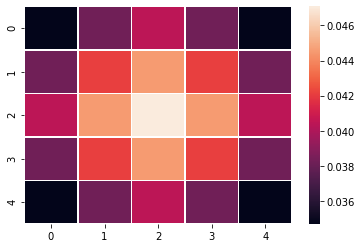

In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

size, sigma = 5, 2
assert size % 2 == 1
n= np.zeros((size,size))
n[(size-1) // 2, (size-1) // 2] = 1
k = gaussian_filter(n,sigma=sigma)
print(k.shape, k.sum())

ax = sns.heatmap(k, linewidth=0.5)
plt.show()

In [5]:
n= np.zeros((21,21))
n[10,10] = 1
k = gaussian_filter(n,sigma=3)
k.shape

(21, 21)

In [5]:
n = 3
p = nn.Parameter(torch.zeros((3, n, n)))
p

Parameter containing:
tensor([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]], requires_grad=True)

In [6]:
scipy.nd

1


2

In [2]:
n = 5
params = nn.ParameterDict({
    'front': nn.Parameter(torch.zeros((1, 3, n, n))),
    'back' : nn.Parameter(torch.zeros((1, 3, n, n))),
    'left' : nn.Parameter(torch.zeros((1, 3, n, n))),
    'right': nn.Parameter(torch.zeros((1, 3, n, n))),
    'top'  : nn.Parameter(torch.zeros((1, 3, n, n))),
    'down' : nn.Parameter(torch.zeros((1, 3, n, n))),
})
params

ParameterDict(
    (back): Parameter containing: [torch.FloatTensor of size 1x3x5x5]
    (down): Parameter containing: [torch.FloatTensor of size 1x3x5x5]
    (front): Parameter containing: [torch.FloatTensor of size 1x3x5x5]
    (left): Parameter containing: [torch.FloatTensor of size 1x3x5x5]
    (right): Parameter containing: [torch.FloatTensor of size 1x3x5x5]
    (top): Parameter containing: [torch.FloatTensor of size 1x3x5x5]
)

In [7]:
torch.nan_to_num_(params['front'].data)

tensor([[[[0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.]],

         [[0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.]],

         [[0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.]]]])

In [8]:
for p in params.values():
    torch.nan_to_num_(p.data)